In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Daily Transactions.csv')
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [ ]:
df.shape

(2461, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


In [ ]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [ ]:
# Check missing values
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [ ]:
# Fill missing values
df['Subcategory'].fillna('Unknown', inplace=True)
df['Note'].fillna('Unknown', inplace=True)

<ipython-input-9-929305dae836>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Unknown', inplace=True)
<ipython-input-9-929305dae836>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,0
Note,0
Amount,0
Income/Expense,0
Currency,0


In [ ]:
# Convert data types
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed')

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Verify data types
df.dtypes

,0
Date,datetime64[ns]
Mode,object
Category,object
Subcategory,object
Note,object
Amount,float64
Income/Expense,object
Currency,object


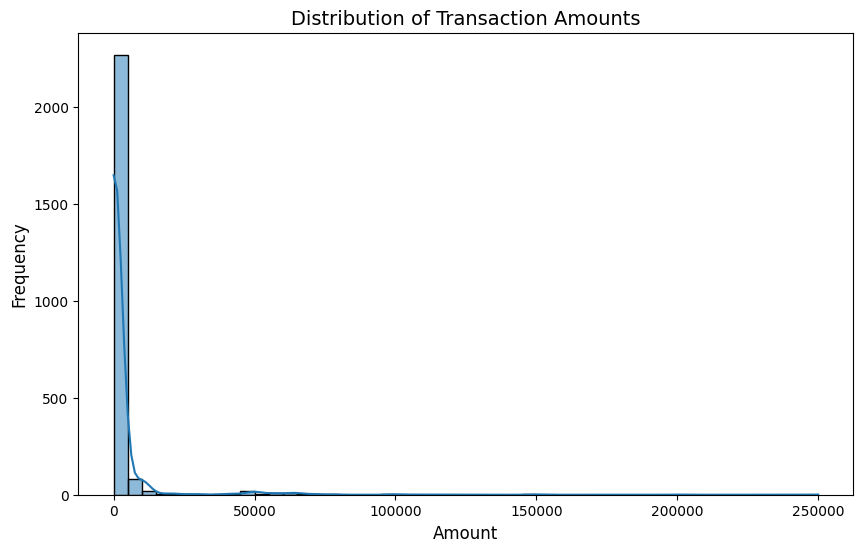

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

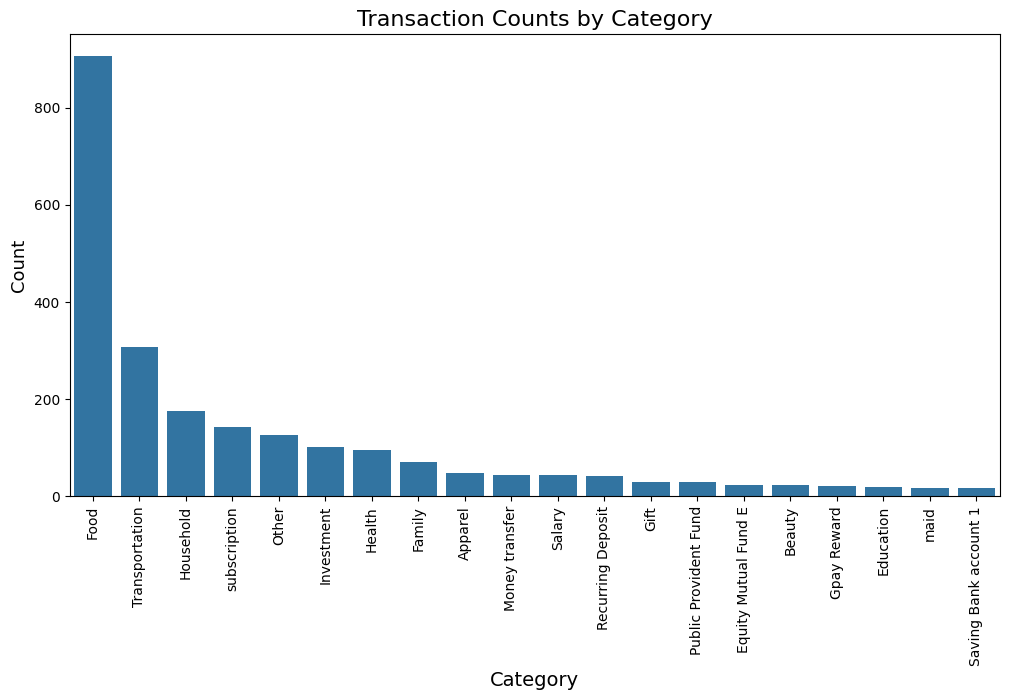

In [ ]:
# Transaction counts by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().iloc[:20].index)
plt.title('Transaction Counts by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=13)
plt.xticks(rotation=90)
plt.show()

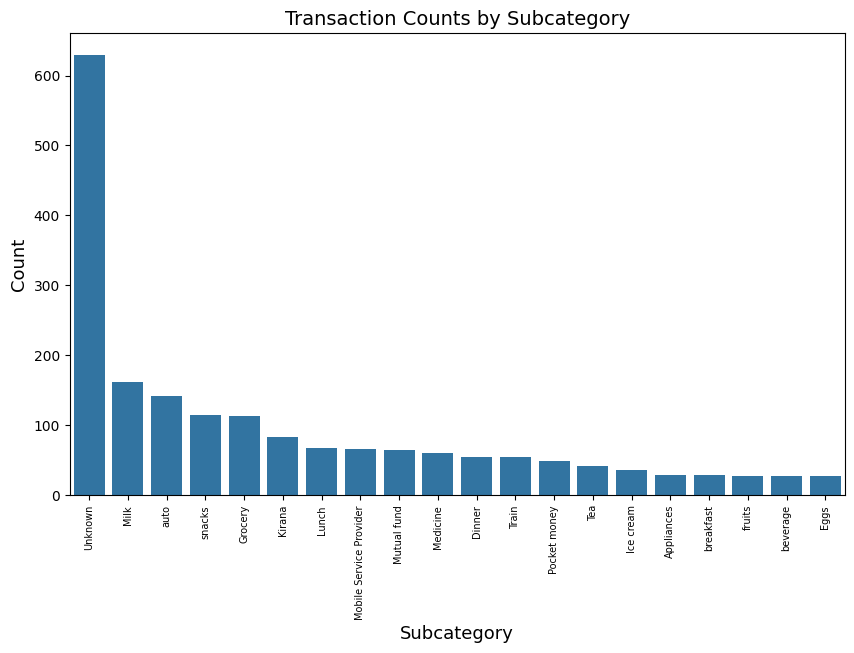

In [ ]:
# Transaction counts by subcategory
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Subcategory', order=df['Subcategory'].value_counts().iloc[:20].index)
plt.title('Transaction Counts by Subcategory', fontsize = 14)
plt.xlabel('Subcategory', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation=90, fontsize = 7)
plt.show()

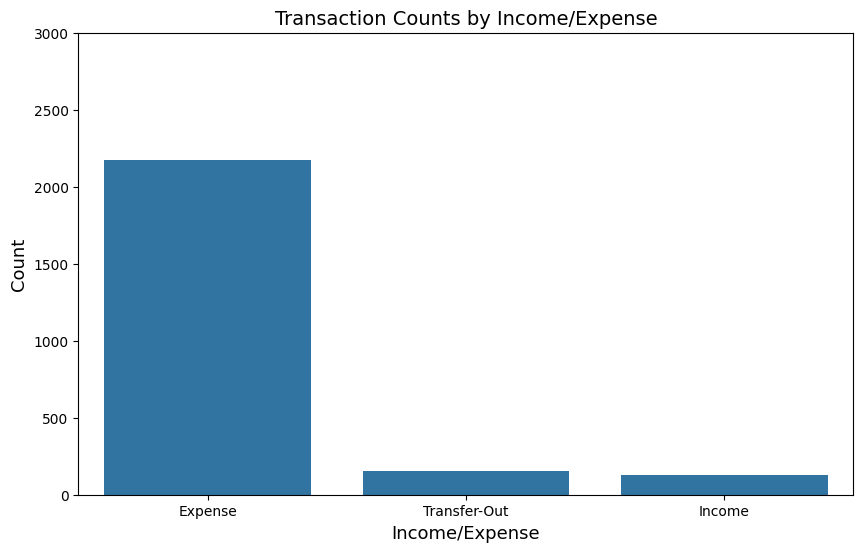

In [ ]:
# Transaction counts by Income/Expense
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income/Expense', order=df['Income/Expense'].value_counts().index)
plt.ylim(0, 3000)
plt.title('Transaction Counts by Income/Expense', fontsize = 14)
plt.xlabel('Income/Expense', fontsize = 13)
plt.ylabel('Count', fontsize = 13)
plt.show()

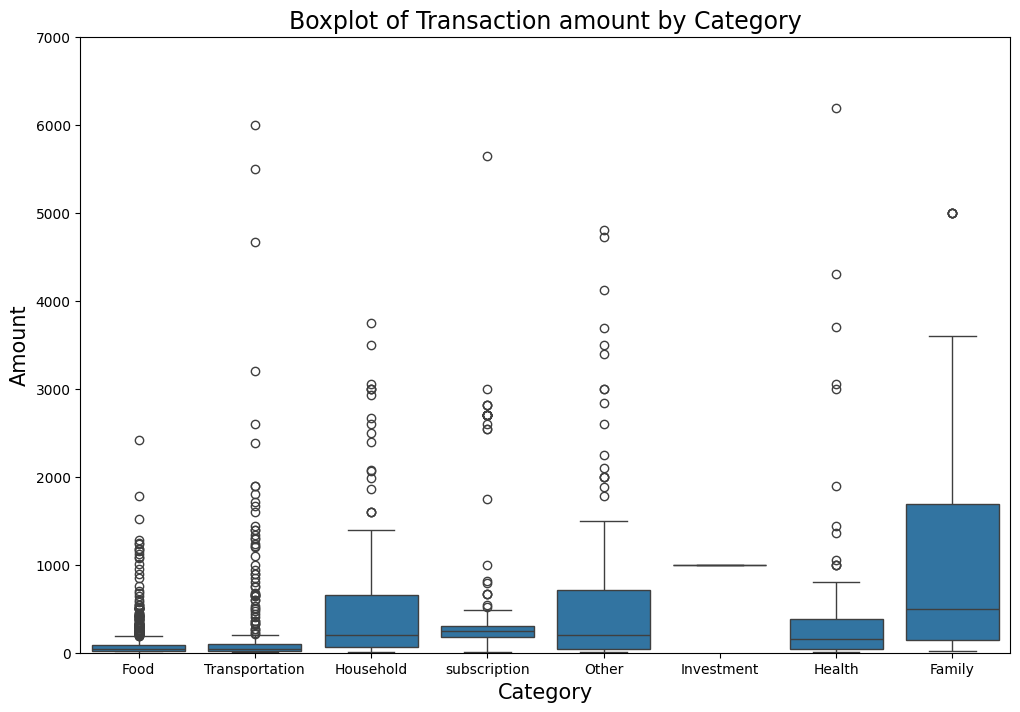

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = "Category", y = "Amount", order = df["Category"].value_counts().iloc[:8].index)
plt.ylim(0,7000)
plt.title('Boxplot of Transaction amount by Category', fontsize=17 )
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Amount', fontsize =15)
plt.show()

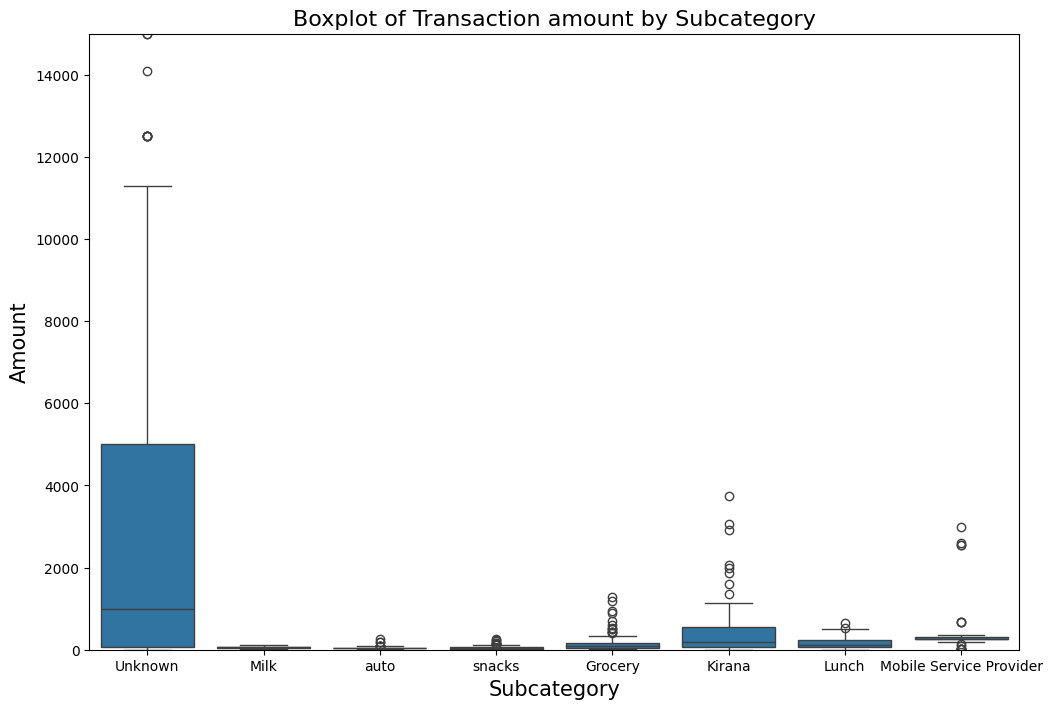

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = "Subcategory", y = "Amount", order = df["Subcategory"].value_counts().iloc[:8].index)
plt.ylim(0,15000)
plt.title('Boxplot of Transaction amount by Subcategory', fontsize=16 )
plt.xlabel('Subcategory', fontsize = 15)
plt.ylabel('Amount', fontsize =15)
plt.show()

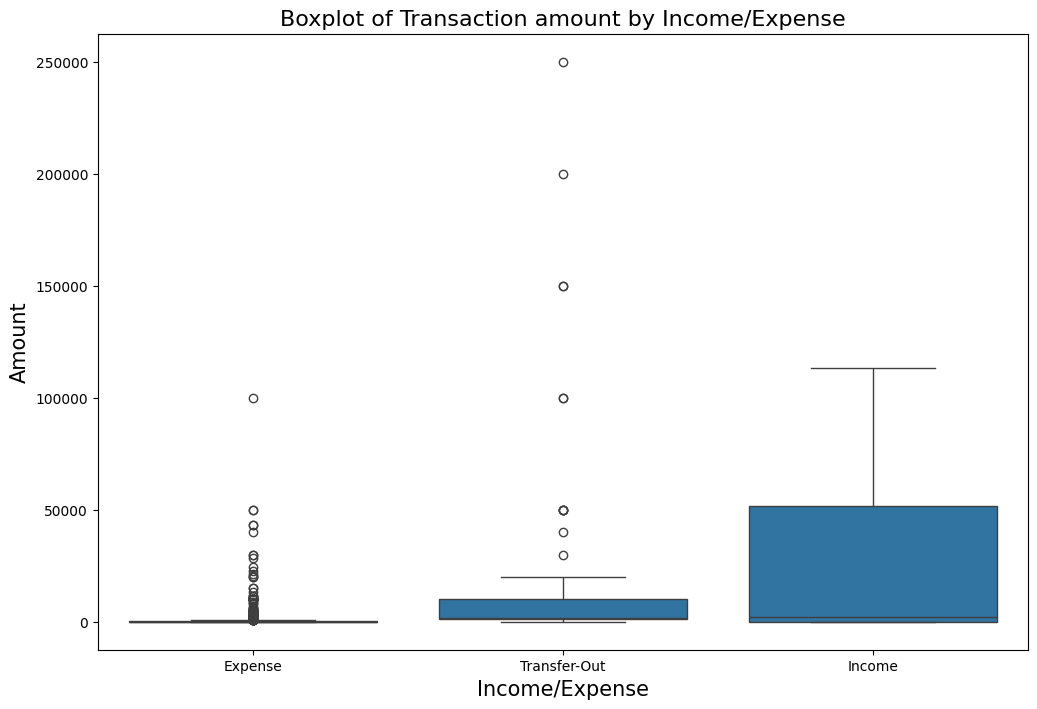

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, x = "Income/Expense", y = "Amount", order = df["Income/Expense"].value_counts().iloc[:8].index)
plt.title('Boxplot of Transaction amount by Income/Expense', fontsize=16 )
plt.xlabel('Income/Expense', fontsize = 15)
plt.ylabel('Amount', fontsize =15)
plt.show()

<ipython-input-60-96dd1394fbc3>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


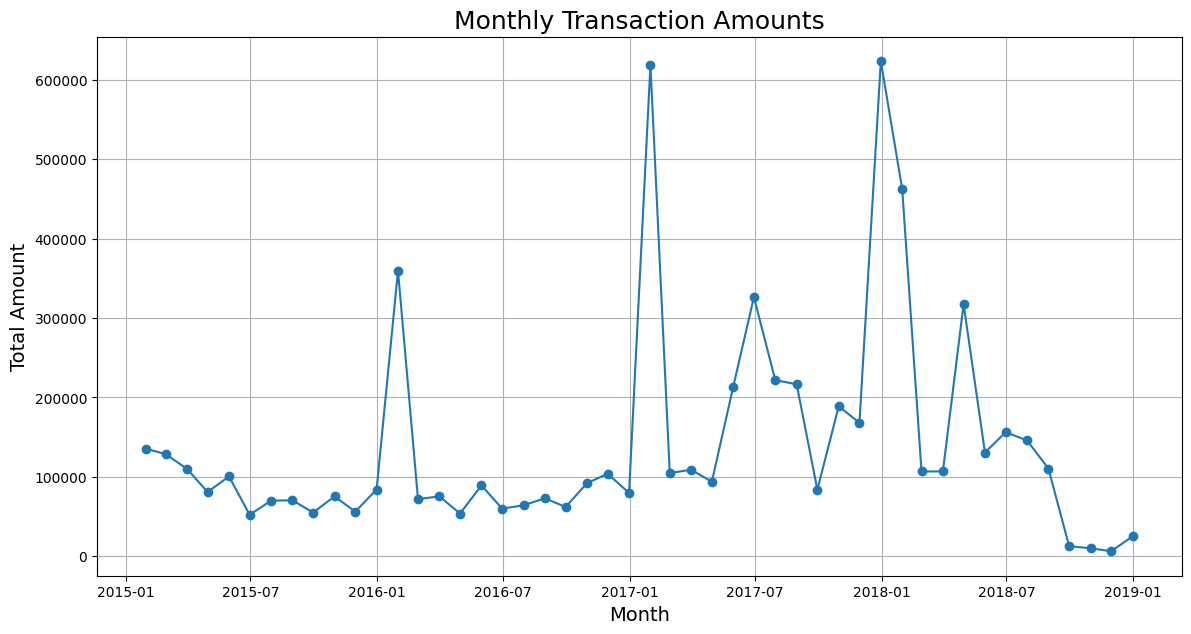

In [ ]:
monthly_data = df.resample('M', on='Date').sum()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts', fontsize =18)
plt.xlabel('Month', fontsize =14)
plt.ylabel('Total Amount', fontsize =14)
plt.grid(True)
plt.show()

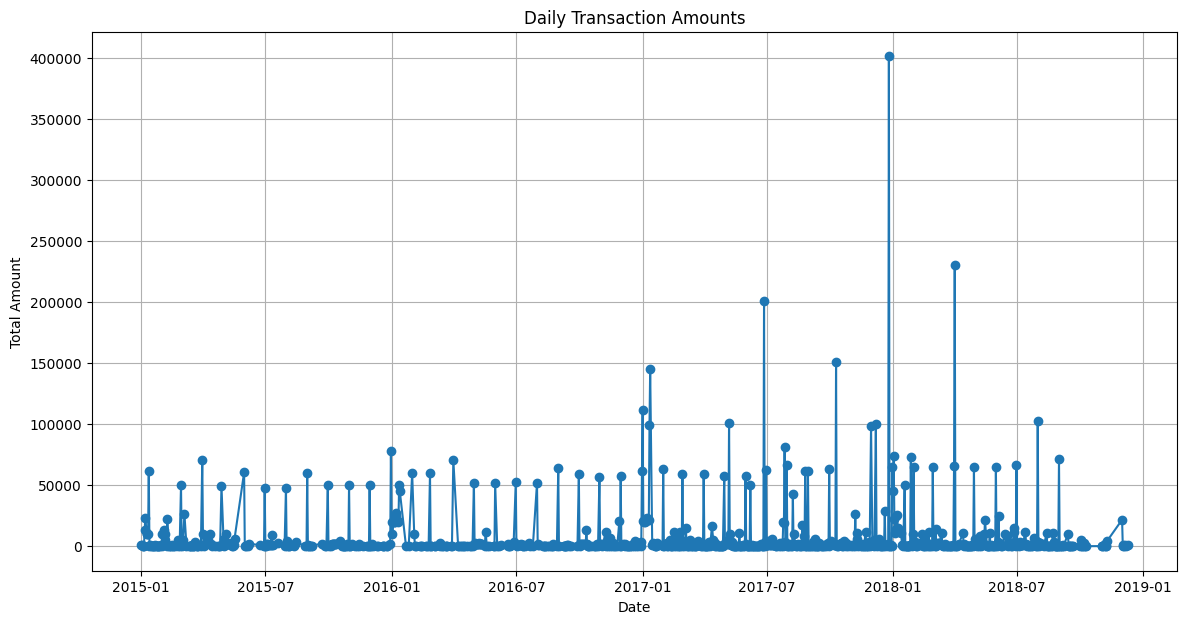

In [ ]:
daily_data = df.groupby(df['Date'].dt.date)['Amount'].sum()

plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data.values, marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

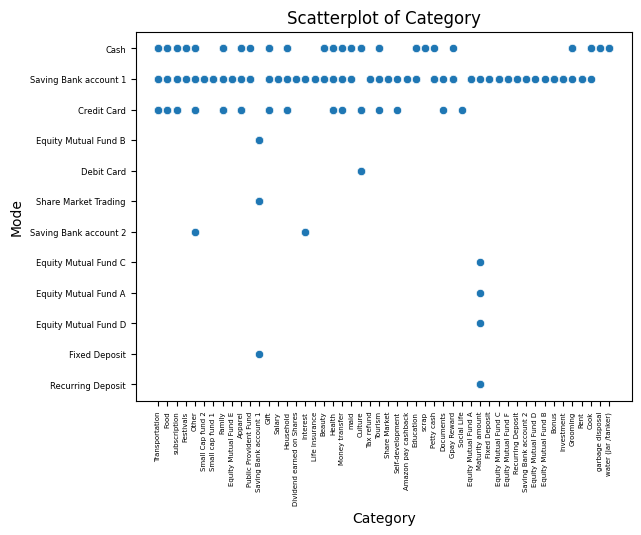

In [ ]:
sns.scatterplot(data = df, x = "Category", y = "Mode")
plt.title('Scatterplot of Category' )
plt.xlabel('Category')
plt.ylabel('Mode')
plt.yticks(fontsize =6)
plt.xticks(rotation = 90, fontsize =5)
plt.show()

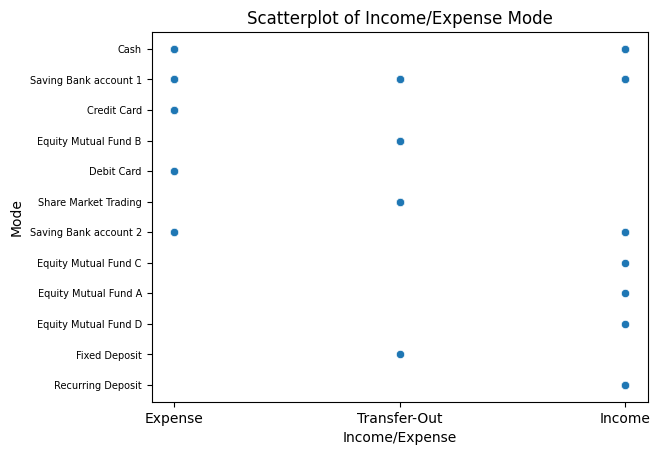

In [ ]:
sns.scatterplot(data = df, x = "Income/Expense", y = "Mode")
plt.title('Scatterplot of Income/Expense Mode' )
plt.xlabel('Income/Expense')
plt.ylabel('Mode')
plt.yticks(fontsize =7)
plt.show()